In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Data Information

In [3]:
df = pd.read_csv("survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
df.shape

(309, 16)

## Data Preprocessing

In [6]:
encoded_data = pd.get_dummies(df, columns=['GENDER'], drop_first=True)
encoded_data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,True
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,False
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,True
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,True
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,True


In [7]:
## YES = 1
## NO = 0
encoder = LabelEncoder()
encoded_data['LUNG_CANCER'] = encoder.fit_transform(encoded_data['LUNG_CANCER'])
encoded_data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,True
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,False
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,True
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,True
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,True


## Data Visualization

In [8]:
cancer_count = encoded_data["LUNG_CANCER"].value_counts()
cancer_count

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

C:\Users\Oluwanifemi\AppData\Local\Temp\ipykernel_12508\2278690751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancer_count.index, y=cancer_count.values, palette='viridis')


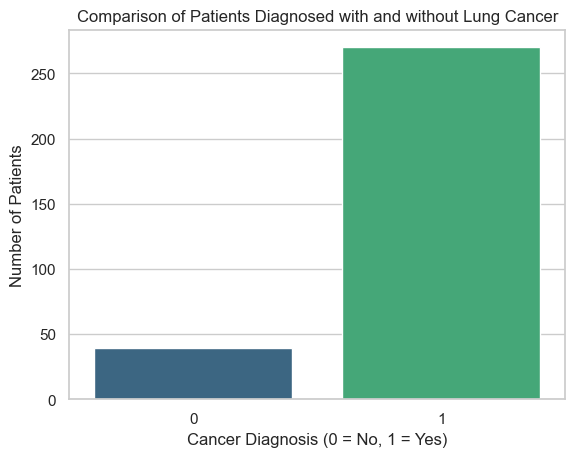

In [9]:
sns.set(style="whitegrid")

sns.barplot(x=cancer_count.index, y=cancer_count.values, palette='viridis')

# Add labels and title
plt.xlabel("Cancer Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.title("Comparison of Patients Diagnosed with and without Lung Cancer")

# Show the plot
plt.show()

In [10]:
corr = encoded_data.corr()

In [11]:
corr_with_target = corr['LUNG_CANCER'].sort_values(ascending=False)
print(corr_with_target)

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER_M                 0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


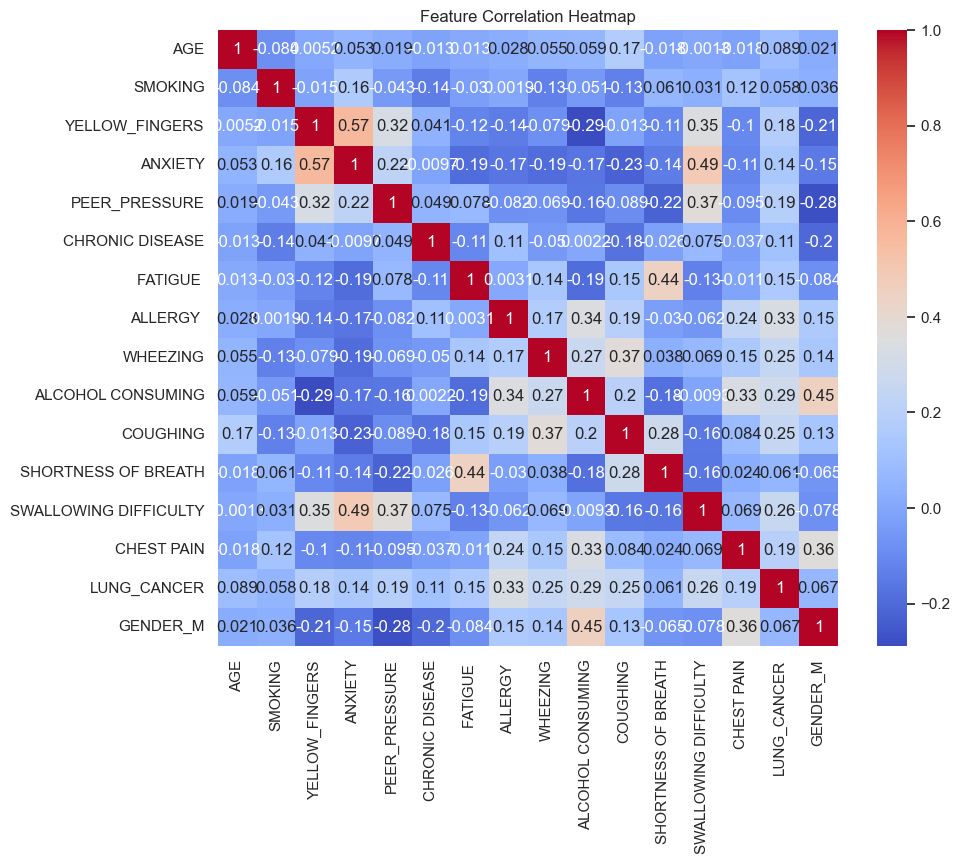

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Splitting the dataset


In [13]:
x = encoded_data.drop("LUNG_CANCER", axis=1)
x

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,True
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,False
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,True
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,True
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,True


In [14]:
y = encoded_data["LUNG_CANCER"]
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

In [16]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
}

results={}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name}")
    print(class_report)

C:\Users\Oluwanifemi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9032
Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.93      0.96      0.95        54

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62

Random Forest Accuracy: 0.9032
Random Forest
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62

SVM Accuracy: 0.8710
SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.87      1.00      0.93        54

    accuracy                           0.87        62
 

C:\Users\Oluwanifemi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Oluwanifemi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Oluwanifemi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


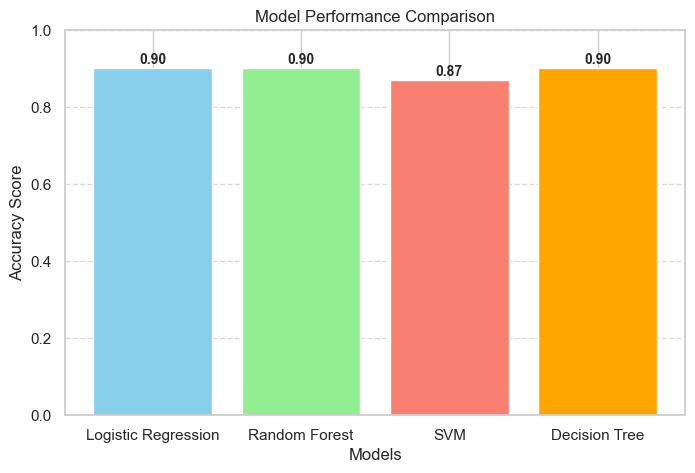

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on top of each bar
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

In [18]:
import joblib

joblib.dump(model, "DecisionTreeModel.pkl")

['DecisionTreeModel.pkl']